#### Linear Regression 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

#### Lung Capacity Data

In [37]:
pd.read_csv(r"C:\Users\waghb\Downloads\LungCapData.csv")

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [38]:
lung=pd.read_csv(r"C:\Users\waghb\Downloads\LungCapData.csv")

In [39]:
lung.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [40]:
lung.isnull().sum()[lung.isnull().sum()>0]

Series([], dtype: int64)

In [41]:
lung.shape

(725, 6)

In [42]:
lung.Smoke.replace({'no':0,'yes':1},inplace=True)
lung.Gender.replace({'male':1,'female':0},inplace=True)
lung.Caesarean.replace({'no':0,'yes':1},inplace=True)

In [43]:
lung.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


In [44]:
from sklearn.model_selection import train_test_split
lung_train,lung_test=train_test_split(lung,test_size=.2)

In [45]:
lung_train_x=lung_train.iloc[::,1:]
lung_train_y=lung_train.iloc[::,0]

In [32]:
lung_train_y=lung_train.iloc[::,0]
lung_train_y

33     11.025
375     6.175
108     6.450
499     7.900
296     6.725
        ...  
195    12.125
185     7.200
323     9.150
27      9.025
233    11.125
Name: LungCap, Length: 580, dtype: float64

In [33]:
lung_train_y=lung_train.iloc[::,2]
lung_train_y

33     65.6
375    63.9
108    63.2
499    64.1
296    59.4
       ... 
195    73.3
185    64.3
323    62.1
27     65.6
233    71.5
Name: Height, Length: 580, dtype: float64

In [31]:
lung_train_x=lung_train.iloc[::,1:]
lung_train_x

,Age,Height,Smoke,Gender,Caesarean
33,13,65.6,0,1,1
375,9,63.9,0,0,1
108,7,63.2,0,1,0
499,13,64.1,0,1,0
296,11,59.4,0,0,0
...,...,...,...,...,...
195,17,73.3,0,1,1
185,10,64.3,0,1,1
323,11,62.1,0,1,0
27,9,65.6,0,1,0


In [16]:
lung_test_x=lung_test.iloc[::,1:]
lung_test_y=lung_test.iloc[::,0]

In [46]:
lung_test_x

,Age,Height,Smoke,Gender,Caesarean
511,12,63.9,1,0,0
448,10,57.8,0,0,0
97,7,64.7,0,1,0
503,5,54.5,0,0,0
15,13,63.5,0,1,1
...,...,...,...,...,...
51,15,74.1,0,1,0
601,19,74.6,0,0,0
367,16,69.1,0,0,1
157,5,55.8,0,0,1


In [47]:
lung_train_x

,Age,Height,Smoke,Gender,Caesarean
634,5,52.8,0,0,0
450,10,58.5,0,0,0
22,16,72.4,0,1,0
422,8,59.4,0,1,0
525,11,68.1,0,1,0
...,...,...,...,...,...
478,16,70.5,1,1,0
480,16,63.4,0,0,1
607,16,78.9,1,1,0
334,14,69.1,0,0,1


In [48]:
lung_test_y

511     6.700
448     4.325
97      6.950
503     2.925
15      9.525
        ...  
51     12.425
601    11.800
367     8.975
157     5.550
593     8.700
Name: LungCap, Length: 145, dtype: float64

In [49]:
lung_train_y

634     2.025
450     4.350
22     10.025
422     5.950
525     8.350
        ...  
478     8.425
480     5.675
607    10.825
334     7.375
93      9.650
Name: LungCap, Length: 580, dtype: float64

In [50]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [51]:
linreg.fit(lung_train_x,lung_train_y)

LinearRegression()

In [52]:
linreg.score(lung_train_x,lung_train_y)

0.8523631642209838

In [53]:
lung_train_x.shape[0]

580

In [54]:
lung_train_x.shape[1]

5

In [55]:
lung_train_x.shape

(580, 5)

In [56]:
Rsquare=linreg.score(lung_train_x,lung_train_y)
n=lung_train_x.shape[0]
k=lung_train_x.shape[1]

adjrsquare=1-(1-Rsquare)*(n-1)/(n-k-1)
adjrsquare

0.8510771290661143

In [57]:
print(linreg.intercept_)

-11.170241735053903


In [58]:
linreg.coef_

array([ 0.16556786,  0.26034915, -0.61808456,  0.46023894, -0.21855771])

In [59]:
pred_train=linreg.predict(lung_train_x)
pred_test=linreg.predict(lung_test_x)

In [60]:
err_train=lung_train_y-pred_train

In [61]:
err_train

634   -1.379033
450   -1.365862
22    -0.763362
422   -0.129280
525   -0.491021
         ...   
478   -1.250614
480   -2.091423
607   -1.037546
334   -1.544277
93     1.527527
Name: LungCap, Length: 580, dtype: float64

In [62]:
err_train.mean()

np.float64(3.693597152270176e-15)

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

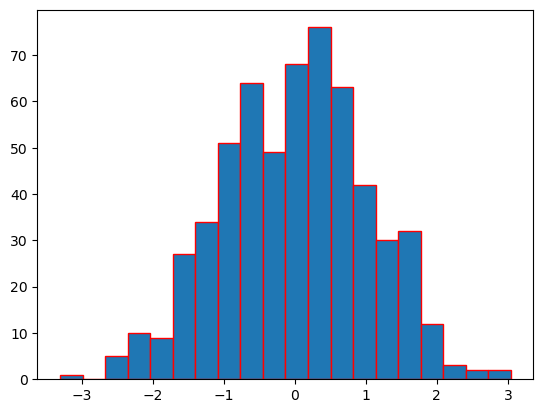

In [64]:
plt.hist(err_train,edgecolor='red',bins=20);

In [66]:
err_train.skew()

np.float64(-0.07375647723781184)

In [67]:
err_train.kurtosis()+3

np.float64(2.75421289313353)

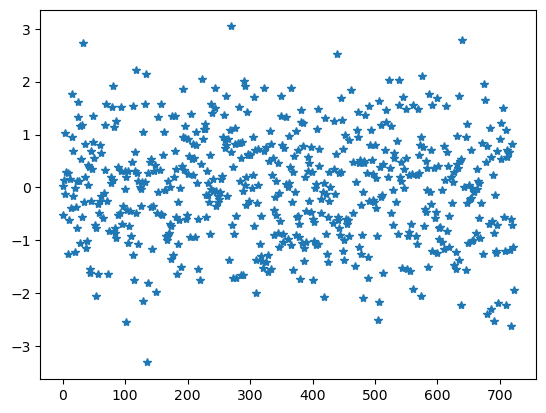

In [68]:
plt.plot(err_train,'*')

In [69]:
pred_act=pd.DataFrame()
pred_act['Actual']=lung_train_y
pred_act['Pred']=pred_train
pred_act

,Actual,Pred
634,2.025,3.404033
450,4.350,5.715862
22,10.025,10.788362
422,5.950,6.079280
525,8.350,8.841021
...,...,...
478,8.425,9.675614
480,5.675,7.766423
607,10.825,11.862546
334,7.375,8.919277


<Axes: xlabel='Actual', ylabel='Pred'>

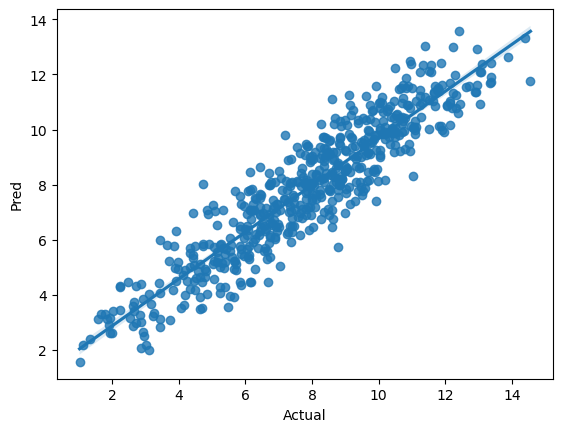

In [70]:
sns.regplot(x='Actual',y='Pred',data=pred_act)

In [71]:
err_test=lung_test_y-pred_test
err_test

511   -0.134799
448   -1.208618
97    -0.343562
503   -0.921626
15     1.769007
         ...   
51     1.359613
601    0.402406
367   -0.275413
157    1.583477
593    0.802483
Name: LungCap, Length: 145, dtype: float64

In [72]:
import numpy as np

In [73]:
mse=np.mean(np.square(err_test))
mse

np.float64(0.9590653589782325)

In [74]:
np.sqrt(mse)

np.float64(0.9793188239680848)

In [76]:
mape=np.mean(np.abs(err_test*100/lung_test_y))
mape

np.float64(12.050418408159457)

In [77]:
acc=100-mape
print(acc)

87.94958159184054
